<font size = "6 px" color=#EC0132 style = "font-family:clarendon">
    <center> <b> ANÁLISIS EXPLORATORIO DE DATOS (EDA) <br><br>
        VENTAS Y CALIFICACIÓN DE VIDEOJUEGOS </b>
    </center>
</font>
<br>

Se hará un  análisis exploratorio de datos para la base de datos de videojuegos rankeados, con la finalidad de contestar las siguientes preguntas
1. ¿En qué año salieron más videojuegos?
2. ¿Qué plataforma de videojuegos vende más y por qué?
3. ¿Qué porcentaje de las ventas corresponde a cada región?
4. ¿En promedio, qué género tiene las peores calificaciones por la crítica?
5. ¿Hay una relación entre el número de ventas y la calificaciones que recibe un videojuego?  
6. ¿Hay una relación entre la calificación de la crítica y la de los usuarios?
7. ¿En qué género de videojuegos difieren más dichas calificaciones?
8. ¿En qué regiones venden más cada género?

Para poder contestar estas preguntas primero se realizará una limpieza de datos (data wrangling), posteriormente se hará un tratamiento de los datos (feature engineering) para así poder prepararlos para las visualizaciones que se mostrarán al responder nuestras preguntas.

# Limpieza de datos

In [1]:
#se importan las librerias a utilizaar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# se carga la dataframe y se visualizan las primeras columnas
df = pd.read_csv("Video_Games_Sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#se observan los atributos de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Podemos notar varios aspectos importantes en el dataframe.
+ El dataframe tiene 16 columnas y 16719 filas  
+ No todas las columnas que están en la base nos sirven, así que se quitarán para tener una base de datos más pequeña y limpia con la que podamos trabajar.  
+ Existen varios datos nulos, los cuales dificultarán el proceso de feature engineering, así que se quitarán sólo las filas que contengan en su mayoría datos nulos.  

Primero se eliminarán las columnas, "Publisher", "Critic_Count", "User_Count", "Developer" y "Rating", ya que no utilizarán para contestar nuestras preguntas

In [4]:
#se eliminan columnas que no se ocuparán
df.drop(columns=["Publisher", "Critic_Count", "User_Count", "Developer", "Rating"], inplace= True)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN


Se explorarán los valores de la columna "Year_of_Release"

In [5]:
df["Year_of_Release"].isnull().value_counts()

False    16450
True       269
Name: Year_of_Release, dtype: int64

In [6]:
df[df["Year_of_Release"].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,5.23,94.0,8.5
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,3.49,84.0,6.4
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,7.9
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,3.00,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,0.01,43.0,NaN
16409,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,0.01,69.0,6.5
16452,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,0.01,59.0,6.7
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.01,NaN,NaN


La columna "Year_of_Release" es de tipo float, tiene algunos datos nulos y algunos de sus datos nulos tienen el año de lanzamiento en su nombre.  
Se colocará el año de lanzamiento en la columna correspondiente a los videojuegos que lo tengan en su nombre, las demás filas se eliminarán y por último se cambiará a tipo entero dicha columna.

In [7]:
#insertando los años de lanzamientos para los títulos que lo llevan en el nombre
for i in range(len(df)):
    if np.isnan(df.loc[i,'Year_of_Release']):
        if df.loc[i, 'Name'].split()[-1].isdigit() and len(df.loc[i, 'Name'].split()[-1] )== 4:
            df.loc[i, 'Year_of_Release'] = int(df.loc[i, 'Name'].split()[-1])

In [8]:
#Conprobando que  ahora sean menos los títulos sin fecha de lanzamiento
df[df["Year_of_Release"].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,3.06,74.0,7.9
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,2.53,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,2.47,92.0,8.2
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,2.39,73.0,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,2.34,78.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...
16351,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16409,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,0.01,69.0,6.5
16452,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,0.01,59.0,6.7
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.01,NaN,NaN


In [9]:
#borrando las filas que no tengan fecha de lanzamiento
df.dropna(axis = 0, subset = ['Year_of_Release'], inplace = True)
df.shape

(16465, 11)

In [10]:
#convirtiendo los datos de flotante a entero
df['Year_of_Release'] = df['Year_of_Release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16465 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16463 non-null  object 
 1   Platform         16465 non-null  object 
 2   Year_of_Release  16465 non-null  int32  
 3   Genre            16463 non-null  object 
 4   NA_Sales         16465 non-null  float64
 5   EU_Sales         16465 non-null  float64
 6   JP_Sales         16465 non-null  float64
 7   Other_Sales      16465 non-null  float64
 8   Global_Sales     16465 non-null  float64
 9   Critic_Score     7994 non-null   float64
 10  User_Score       7472 non-null   float64
dtypes: float64(7), int32(1), object(3)
memory usage: 1.4+ MB


Se explorarán las columnas "Critic_score" y "User_score" para notar cuantos datos faltantes tienen y así poder tomar la decisión de si borrar las filas o hacer otro tratamiento con esos datos.

In [11]:
#Cuantas filas tienen datos faltantes en las columnas "Critic_Score" y "User_Score"
df[df['Critic_Score'].isnull() & df['User_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,24.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN


In [12]:
#Cuantas filas tienen datos faltantes en las columnas "Critic_Score" o "User_Score"
df[df['Critic_Score'].isnull() | df['User_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,24.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16715,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN
16717,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN


In [13]:
len(df[df['Critic_Score'].isnull() | df['User_Score'].isnull()])/len(df)

0.5807470391740055

No hay gran diferencia en el número de filas que tienen valores nulos en ambas columnas o en al menos una, así que no habrá problema en tomar los valores que no tienen ningún valor nulo en estas columnas. Pero el total de columnas con al menos un valor nulo es más de la mitad, así que no es buena idea borrarlos, así que lo mejor será crear otro dataframe sin valores nulos para su posterior análisis.

In [14]:
#Creando un nuevo dataframe sin valores nulos en las columnas "Critic_Score" y "User_Score"
df_Score = df[df['Critic_Score'].notnull() & df['User_Score'].notnull()]
df_Score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6903 entries, 0 to 16709
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6903 non-null   object 
 1   Platform         6903 non-null   object 
 2   Year_of_Release  6903 non-null   int32  
 3   Genre            6903 non-null   object 
 4   NA_Sales         6903 non-null   float64
 5   EU_Sales         6903 non-null   float64
 6   JP_Sales         6903 non-null   float64
 7   Other_Sales      6903 non-null   float64
 8   Global_Sales     6903 non-null   float64
 9   Critic_Score     6903 non-null   float64
 10  User_Score       6903 non-null   float64
dtypes: float64(7), int32(1), object(3)
memory usage: 620.2+ KB


# Feuture engineering

Las columnas 'Critic_Score' y 'User_Score' no tienen la misma escala así que los valores de 'User_Score' se multiplicarán por 10 para así estar rankeados del 0 al 100 como en la columna 'Critic_Score'

In [15]:
df_Score['User_Score'] = df_Score['User_Score'].apply(lambda x: int(x*10))
df_Score['Critic_Score'] = df_Score['Critic_Score'].astype(int)
df_Score.head()

<ipython-input-15-1ec1b81a02f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Score['User_Score'] = df_Score['User_Score'].apply(lambda x: int(x*10))
<ipython-input-15-1ec1b81a02f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Score['Critic_Score'] = df_Score['Critic_Score'].astype(int)


,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76,80
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82,83
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80,80
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89,85
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,58,66


Con todo listo, en la siguiente sección finalizaremos el análisis exploratorio de datos utilizando para ello visualizaciones que ayuden a respoder de una manera más sencilla y dinámica cada una de las preguntas.

# Data visualization

## ¿En qué año salieron más videojuegos?

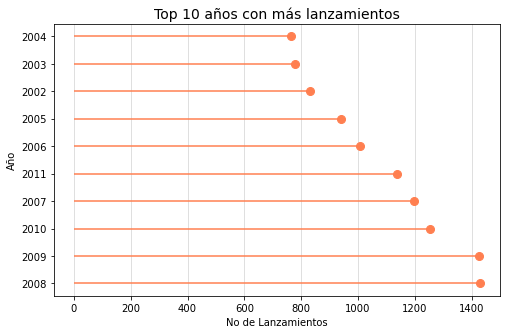

In [16]:
top = df['Year_of_Release'].value_counts().head(10)
df1 = pd.DataFrame({'Año': top.index, 'Lanzamientos': top})

df1 = df1.sort_values(by='Lanzamientos')
rango = range(1,len(df1.index)+1)

plt.figure(figsize = (8,5))
plt.hlines(y = rango, xmin = 0, xmax = top, color='coral')
plt.plot(top, rango, "o", color = 'coral' , markersize = 8)
plt.yticks(ticks=rango, labels=top.index)
plt.title('Top 10 años con más lanzamientos', size = 14)
plt.xlabel('No de Lanzamientos')
plt.ylabel('Año')
plt.grid(axis = 'x', alpha = 0.5)
plt.show()

Fue en el 2008 donde salieron más videojuegos. De hecho el top 10 se encuentra del 2002 al 2011 consecutivamente.

## ¿Qué plataforma de videojuegos vende más y por qué?

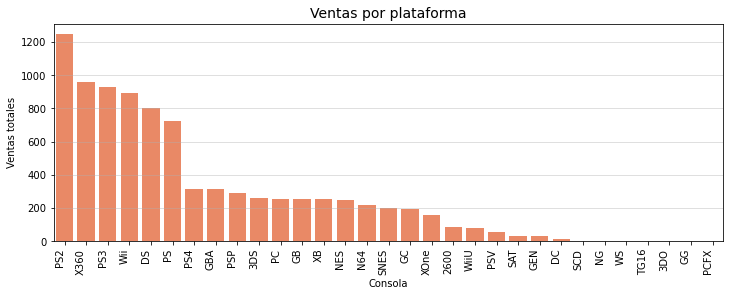

In [17]:
plat_sales = df.pivot_table(index = 'Platform', values = 'Global_Sales', aggfunc = sum)
df2 = pd.DataFrame({'Consolas': plat_sales.index, 'Ventas': plat_sales['Global_Sales']})

plt.figure(figsize = (12,4))
plt.grid(axis = 'y', alpha = 0.5)
ax = sns.barplot(data = df2, x = 'Consolas', y = 'Ventas', color = 'coral',
                 order = df2.sort_values('Ventas', ascending = False).Consolas)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Ventas por plataforma', size = 14)
plt.xlabel('Consola')
plt.ylabel('Ventas totales')
plt.show()

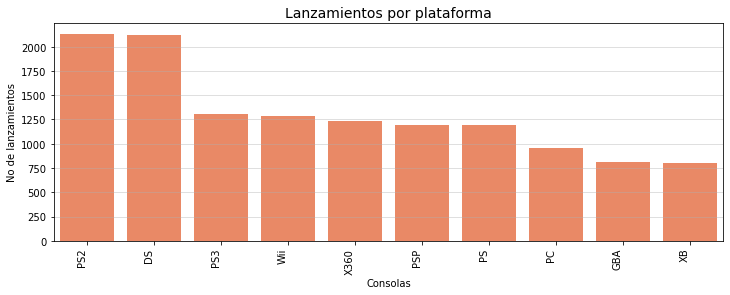

In [18]:
console = df['Platform'].value_counts().head(10)
df_2 = pd.DataFrame({'Consolas': console.index, 'Lanzamientos': console})

plt.figure(figsize = (12,4))
plt.grid(axis = 'y', alpha = 0.5)
ax = sns.barplot(data = df_2, x = 'Consolas', y = 'Lanzamientos', color = 'coral')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'right')
plt.title('Lanzamientos por plataforma', size = 14)
plt.xlabel('Consolas')
plt.ylabel('No de lanzamientos')
plt.show()


Como se podría suponer, hay una relación con el número de lanzamientos y las ventas, pero hay algunos casos, como X360 en el que las ventas fueron mayores que en el caso de DS y Ps3 a pesar de que estos tuvieron un mayor número de lanzamientos.

## ¿Qué porcentaje de las ventas corresponde a cada región?

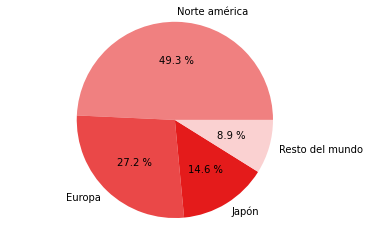

In [19]:
df3= df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
df3 = df3.rename({'NA_Sales': 'Norte américa','EU_Sales':'Europa','JP_Sales':'Japón','Other_Sales':'Resto del mundo'})
df3 = pd.DataFrame({'Regiones': df3.index, 'Ventas_region': df3})

colores = ["#f08080","#ea4848","#e41b1b","#fad1d1","#f4a4a4"]

plt.pie(df3['Ventas_region'], labels=df3['Regiones'], autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.show()

El mayor número de ventas son en Norte américa, casi por el doble de Europa, que son la segunda región con más ventas, mmientras que Japón, siendo un sólo país, realiza más ventas que el resto del mundo.

## ¿En promedio, qué género tiene las peores calificaciones por la crítica?

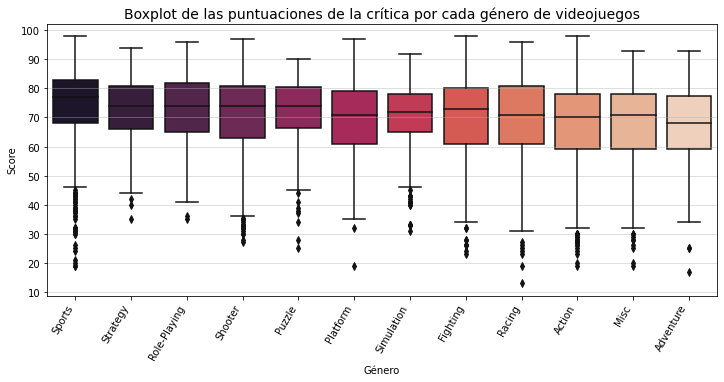

In [20]:
plt.figure(figsize= (12, 5))
ax = sns.boxplot(x="Genre", y="Critic_Score", data = df_Score, palette = 'rocket',
                order = df_Score.groupby('Genre')['Critic_Score'].mean().sort_values(ascending = False).index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, ha = 'right')
ax.set_yticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Género')
plt.ylabel('Score')
plt.title('Boxplot de las puntuaciones de la crítica por cada género de videojuegos', size = 14)
plt.grid(axis = 'y', alpha = 0.5)
plt.show()

Podemos sacar varias conclusiones de esta imagen. No hay gran diferencia entre los promedios ni las formas de los bloxplot, todas los boxplot tienen datos bastantes dispersos; Los géneros, Strategy, Puzzle y Simulation tienen los datos menos dispersos, curioso que los géneros donde más hay que pensar y estar consentrado son los que más de acuerdo están los críticos sobre sus puntuaciones; por otra parte, los que parecen más dispersos parecen ser los géneros con más acción y violencia.

## ¿Hay una relación entre las ventas y las calificaciones que recibe un videojuego?

In [21]:
corr = df_Score.corr()
corr[corr > 0.8]

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
Year_of_Release,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,NaN,1.000000,0.840232,NaN,NaN,0.955536,NaN,NaN
EU_Sales,NaN,0.840232,1.000000,NaN,NaN,0.938739,NaN,NaN
JP_Sales,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Other_Sales,NaN,NaN,NaN,NaN,1.000000,0.804386,NaN,NaN
Global_Sales,NaN,0.955536,0.938739,NaN,0.804386,1.000000,NaN,NaN
Critic_Score,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
User_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Un coeficiente de pearson mayor a 0.8 indica una gran correlación entre variables. Las ventas globales tienen gran correlación con las ventas en las demás regiones, pero esto es una obviedad ya que simplemente es la suma de todas estas. La única posible relevancia es la correlación entre las ventas en Norte américa y Europa, esto podría indicar que los gustos en ambas regiones son semejantes y si un juego triunfa en un lugar, puede triunfar en el otro.

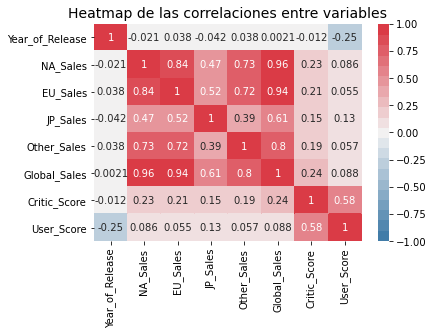

In [22]:
sns.heatmap(corr, vmin = -1, vmax = 1, center= 0,annot=True,
           cmap= sns.diverging_palette(240, 10, n=21), square = False)
plt.title('Heatmap de las correlaciones entre variables', size = 14)
plt.show()

Como se puede observar en el heatmap, no hay una buena correlación entre las puntuaciones de la crítica y la de los usuarios con respecto a las ventas. Esto quiere decir que no por teneruna buena calificación, significa que un videojuego tendrá buenas ventas.

## ¿Hay una relación entre la calificación de la crítica y la de los usuarios?

<Figure size 576x576 with 0 Axes>

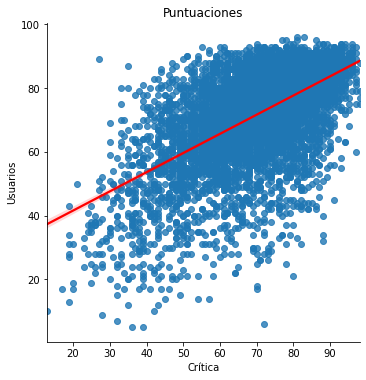

In [23]:
plt.figure(figsize = (8,8))
sns.lmplot(x="Critic_Score", y="User_Score", data=df_Score, line_kws={'color': 'red'})
plt.xlabel('Crítica')
plt.ylabel('Usuarios')
plt.title('Puntuaciones')
plt.show()

Como habiamos visto anteriormente en el heatmap, el coeficiente de pearson entre las puntuaciones de la crítica y los usuarios es de 0.58, esto quiere decir que la relación entre ellos es moderada, pero no podriamos predecir con exactitud que si un videojuego tiene una calificación buena por la critica la tendría en la de los usuarios.

## ¿En qué género de videojuegos difieren más dichas calificaciones?

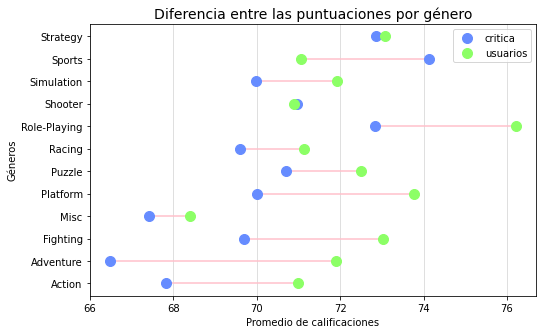

In [24]:
critica = df_Score.groupby('Genre')['Critic_Score'].mean()
usuarios = df_Score.groupby('Genre')['User_Score'].mean()

rango = range(1,len(critica.index)+1)

plt.figure(figsize = (8,5))
plt.hlines(y = rango, xmin = usuarios, xmax = critica, color='#FFC0CB')
plt.plot(critica, rango, "o", color = '#668cff', markersize = 10)
plt.plot(usuarios, rango, 'o', color = '#8cff66', markersize = 10)
plt.yticks(ticks=rango, labels=critica.index)
plt.title('Diferencia entre las puntuaciones por género', size = 14)
plt.xlabel('Promedio de calificaciones')
plt.ylabel('Géneros')
plt.grid(axis = 'x', alpha =0.5)
plt.legend(['critica', 'usuarios'])
plt.show()

Podemos notar que en promedio, las puntuaciones de la crítica son menores que la de los usuarios, excepto en Strategy y Shooter, pero en estás dos categorías las puntuaciones son muy semejantes. Es en Adventure donde ambas opiniones difieren más.

## ¿En qué regiones venden más cada género?

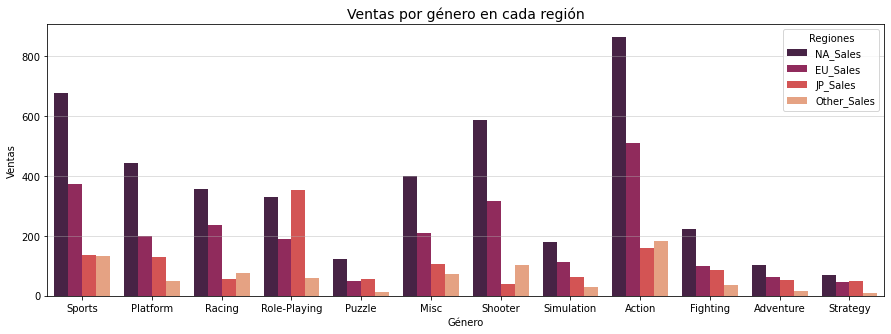

In [25]:
df8 = pd.melt(df, id_vars = ['Genre'], value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
             var_name = 'Regiones', value_name = 'Ventas')

plt.figure(figsize = (15,5))
sns.barplot(data = df8, x = 'Genre', y = 'Ventas', hue = 'Regiones', estimator = sum, ci = None, palette = 'rocket')
plt.xlabel('Género')
plt.title('Ventas por género en cada región', size = 14)
plt.grid(alpha = 0.5, axis = 'y')
plt.show()

En la gran mayoria de géneros es la región de Norte américa donde más ventas tiene cada género, aunque hay algunas excepciones como lo es en el género de Role-Playing ya que es en Japón donde más se consume este género, y sólo es en Action y Shooter donde "el resto del mundo" consume más videojuegos que Japón.

Con este análisis pudimos encontrar varios datos importantes con los cuales podriamos tomar mejores decisiones y tenemos una mejor idea de cómo son los hábitos de consumo y de valoración que tienen los consumidores de videojuegos.